In [45]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [46]:
train = pd.read_csv('../input/siim-isic-melanoma-classification/train.csv')
test = pd.read_csv('../input/siim-isic-melanoma-classification/test.csv')

In [47]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33126 entries, 0 to 33125
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   image_name                     33126 non-null  object 
 1   patient_id                     33126 non-null  object 
 2   sex                            33061 non-null  object 
 3   age_approx                     33058 non-null  float64
 4   anatom_site_general_challenge  32599 non-null  object 
 5   diagnosis                      33126 non-null  object 
 6   benign_malignant               33126 non-null  object 
 7   target                         33126 non-null  int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 2.0+ MB


In [48]:
train.head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
0,ISIC_2637011,IP_7279968,male,45.0,head/neck,unknown,benign,0
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,benign,0
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0
3,ISIC_0068279,IP_6890425,female,45.0,head/neck,unknown,benign,0
4,ISIC_0074268,IP_8723313,female,55.0,upper extremity,unknown,benign,0


In [49]:
train.isna().sum()

image_name                         0
patient_id                         0
sex                               65
age_approx                        68
anatom_site_general_challenge    527
diagnosis                          0
benign_malignant                   0
target                             0
dtype: int64

In [50]:
#not many null values for the size of the dataset

In [51]:
len(set(train.patient_id))

#33k rows, only 2056 different patient id's, so lots of patients with more than one entry in the dataset. 

2056

In [52]:
train.sex.fillna('unknown', inplace = True)
train.anatom_site_general_challenge.fillna('unknown', inplace = True)  
train.age_approx.fillna(np.median(train.age_approx))

test.sex.fillna('unknown', inplace = True)
test.anatom_site_general_challenge.fillna('unknown', inplace = True)  
test.age_approx.fillna(np.median(test.age_approx))

0        70.0
1        40.0
2        55.0
3        50.0
4        45.0
         ... 
10977    40.0
10978    35.0
10979    25.0
10980    65.0
10981    30.0
Name: age_approx, Length: 10982, dtype: float64

Text(0.5, 1.0, 'Number of images per patient - Test')

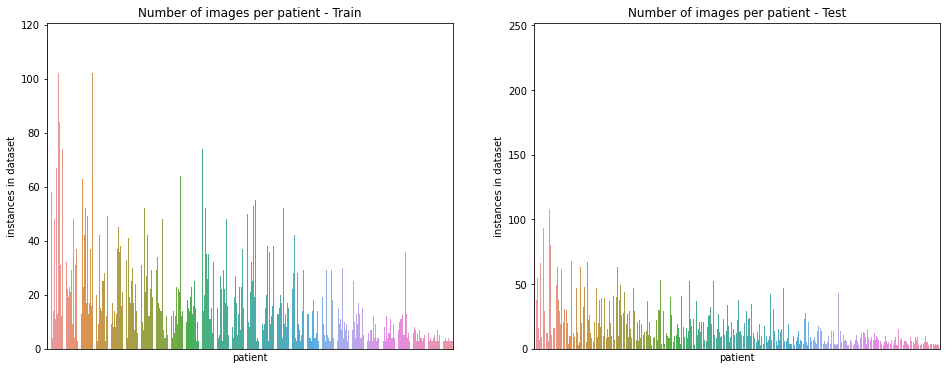

In [53]:
f, (ax1, ax2) = plt.subplots(1,2, figsize = (16,6))

a = sns.countplot(train.patient_id, ax = ax1)
b = sns.countplot(test.patient_id, ax = ax2)

ax1.set(xlabel = 'patient', ylabel = 'instances in dataset')
ax2.set(xlabel = 'patient', ylabel = 'instances in dataset')

ax1.set_xticks([])
ax2.set_xticks([])

ax1.set_title('Number of images per patient - Train')
ax2.set_title('Number of images per patient - Test')




In [54]:
#can see that in both the train and test set that certain participants have many more images in the dataset than others

Text(0.5, 1.0, 'target variable for training set')

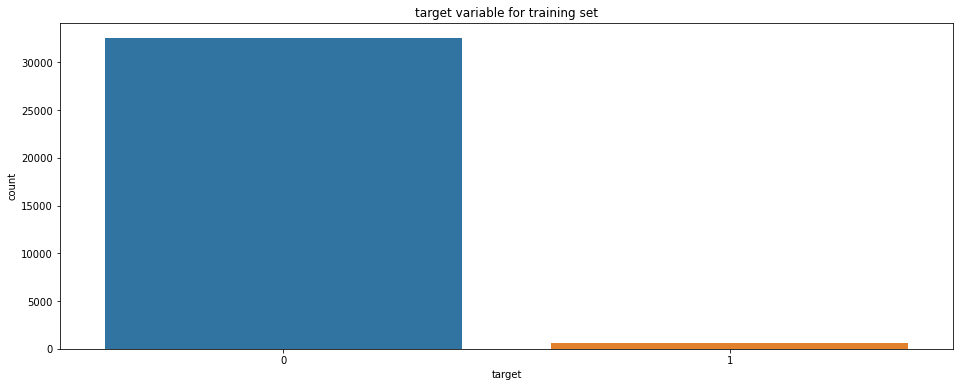

In [55]:
f =  plt.figure(figsize = (16,6))

sns.countplot(train.target).set_title('target variable for training set')

In [56]:
#heavily unbalanced target variable 

Text(0.5, 1.0, 'Test Anatom')

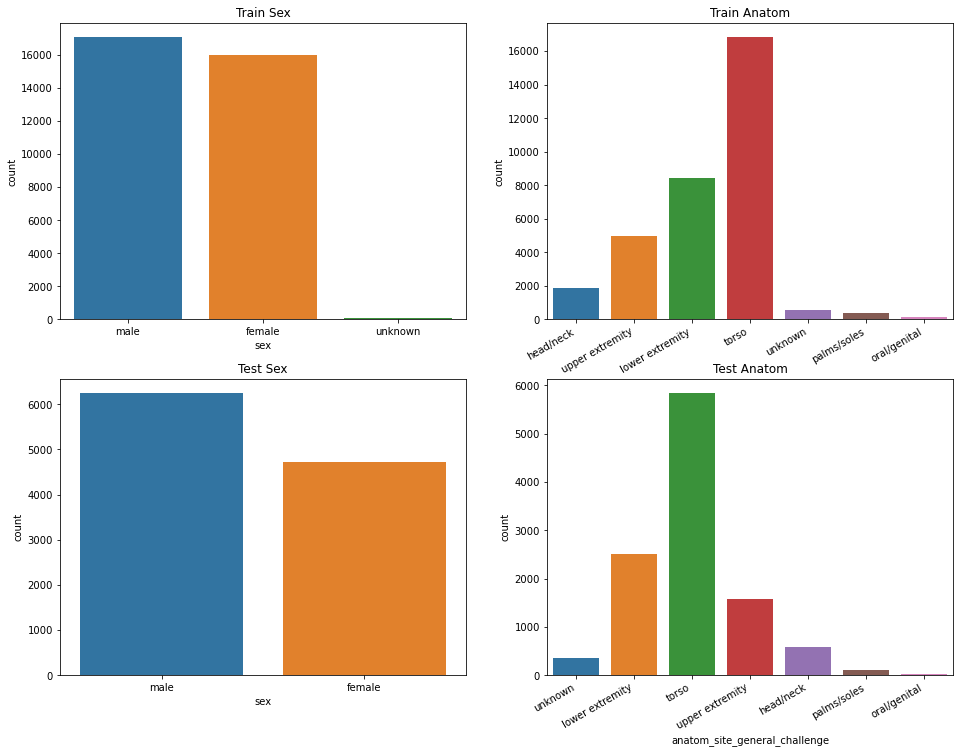

In [57]:
f, axs = plt.subplots(2,2, figsize = (16,12))

a  = sns.countplot(train.sex, ax = axs[0,0])
b = sns.countplot(train.anatom_site_general_challenge, ax = axs[0,1])
c  = sns.countplot(test.sex, ax = axs[1,0])
d = sns.countplot(test.anatom_site_general_challenge, ax = axs[1,1])

b.set_xticklabels(b.get_xticklabels(), rotation = 30, ha = 'right')
d.set_xticklabels(d.get_xticklabels(), rotation = 30, ha = 'right')

axs[0,0].set_title('Train Sex')
axs[0,1].set_title('Train Anatom')
axs[1,0].set_title('Test Sex')
axs[1,1].set_title('Test Anatom')

In [58]:
#slightly more male participants, ratio is larger in the test set 
#most common case in torso


Text(0.5, 1.0, 'Age vs Sex')

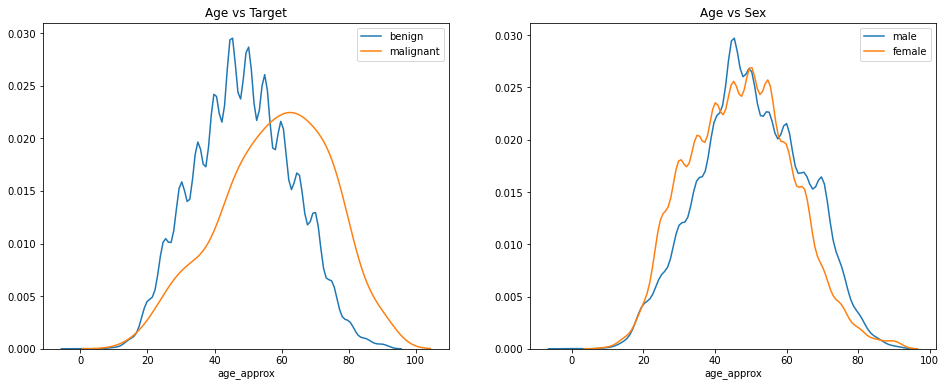

In [59]:
#age distributions 

f, (ax1, ax2) = plt.subplots(1,2, figsize=(16,6))

sns.distplot(train.loc[train.target == 0, 'age_approx'], hist = False, label = 'benign',ax = ax1)
sns.distplot(train.loc[train.target == 1, 'age_approx'], hist = False, label = 'malignant', ax = ax1)

sns.distplot(train.loc[train.sex == 'male', 'age_approx'], hist = False, label = 'male', ax = ax2)

sns.distplot(train.loc[train.sex == 'female', 'age_approx'], hist = False, label = 'female', ax = ax2)

ax1.set_title('Age vs Target')
ax2.set_title('Age vs Sex')



In [60]:
#Age distribution is normal, skewed to the left for malignant
#Male patients slightly older

[Text(0, 0, 'upper extremity'),
 Text(0, 0, 'torso'),
 Text(0, 0, 'lower extremity'),
 Text(0, 0, 'head/neck'),
 Text(0, 0, 'palms/soles'),
 Text(0, 0, 'unknown'),
 Text(0, 0, 'oral/genital')]

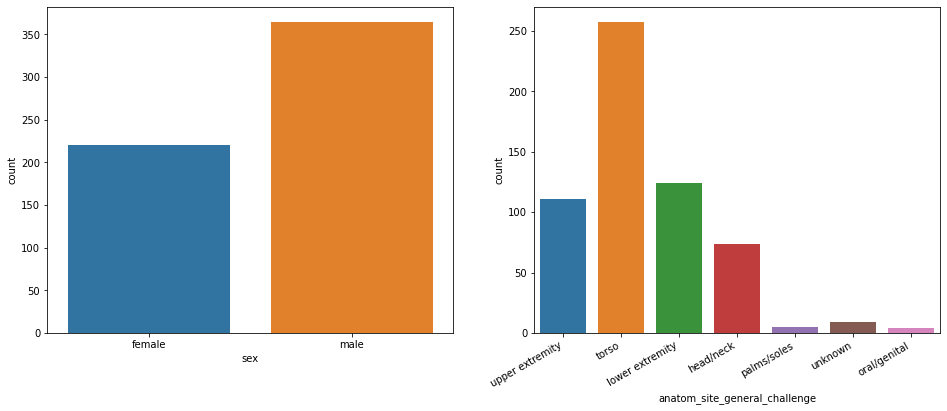

In [61]:
f, axs = plt.subplots(1, 2, figsize = (16,6))

a = sns.countplot(train.loc[train.target == 1, 'sex'], ax = axs[0])
b = sns.countplot(train.loc[train.target == 1, 'anatom_site_general_challenge'], ax = axs[1])
b.set_xticklabels(b.get_xticklabels(), rotation = 30, ha = 'right')



In [62]:
#skew towards males is more pronounced in the malignant category of the target variable

In [63]:
train.sex.value_counts()

male       17080
female     15981
unknown       65
Name: sex, dtype: int64

In [64]:
#seems to be an inbalance between male and female participants for the target 

In [65]:
TRAIN = '../input/siim-isic-melanoma-classification/jpeg/train'
TEST = '../input/siim-isic-melanoma-classification/test'

In [66]:
import os
import skimage.io 

In [67]:
train_shapes = []

for i, image_id in enumerate(train['image_name'][:100]):
    path = os.path.join(TRAIN,image_id)+'.jpg'
    img = skimage.io.imread(path)
    train_shapes.append(img.shape)

train_shapes = np.asarray(train_shapes)

[Text(0, 0, '4000x6000'),
 Text(0, 0, '1053x1872'),
 Text(0, 0, '3456x5184'),
 Text(0, 0, '1936x2592'),
 Text(0, 0, '2848x4288'),
 Text(0, 0, '2448x3264'),
 Text(0, 0, '480x640'),
 Text(0, 0, '1936x1936')]

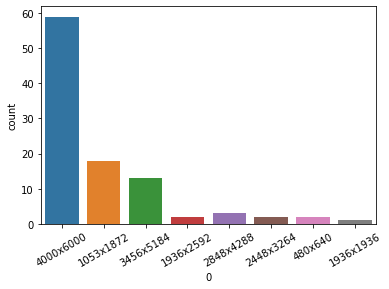

In [68]:
shapes = pd.DataFrame([(str(shape[0])+ 'x' +str(shape[1])) for shape in train_shapes])
a = sns.countplot(shapes[0])
a.set_xticklabels(a.get_xticklabels(), rotation = 30)

In [69]:
#size of images varies, should standardise

In [70]:
def display_images(x, n, target, rows, cols,Train = True):
    plt.figure(figsize = (16,4))
    
    for i, image_id in enumerate(x.loc[x.target == target, 'image_name'][:n]):
        if Train:
            path = os.path.join(TRAIN,image_id)+'.jpg'
        else:
            path = os.path.join(TEST,image_id)+'.jpg'
        if target == 1:
            plt.suptitle('Malignant Images')
        else:
            plt.suptitle('Beningn Images')
        img = skimage.io.imread(path)
        plt.subplot(rows, cols, i+1)
        plt.imshow(img)
        plt.axis('off')
            

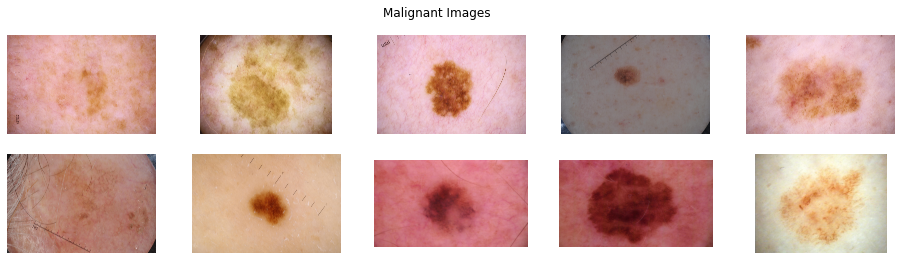

In [71]:
display_images(train, n = 10, target = 1,rows =  2 ,cols = 5  )

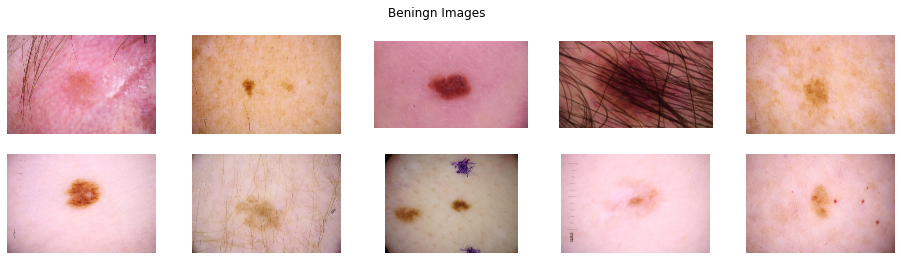

In [72]:
display_images(train, n = 10, target = 0,rows =  2 ,cols = 5  )

In [73]:
#sample of the images in both of the target categories

Conclusions

Highly imbalanced target distribution -> oversampling will be necessary for modelling phase. 

Sex and Age are correlated with the target -> metdata should be predictive 

Patients tend to have multiple images in the dataset each, does this have implications for stratifying the data for cross validation?

Large range of sizes of images, should standardise these in advance of modelling. 